In [364]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from imblearn.over_sampling import RandomOverSampler
from sklearn.model_selection import train_test_split

columns = ['fLength','fWidth','fSize','fConc','fConc1','fAsym','fM3Long','fM3Trans','fAlpha','fDist','class']
data = pd.read_csv(r"C:\Users\Ruchir\Downloads\magic+gamma+telescope\magic04.data", sep=',', header=None, names=columns)
data.head()

,fLength,fWidth,fSize,fConc,fConc1,fAsym,fM3Long,fM3Trans,fAlpha,fDist,class
0,28.7967,16.0021,2.6449,0.3918,0.1982,27.7004,22.0110,-8.2027,40.0920,81.8828,g
1,31.6036,11.7235,2.5185,0.5303,0.3773,26.2722,23.8238,-9.9574,6.3609,205.2610,g
2,162.0520,136.0310,4.0612,0.0374,0.0187,116.7410,-64.8580,-45.2160,76.9600,256.7880,g
3,23.8172,9.5728,2.3385,0.6147,0.3922,27.2107,-6.4633,-7.1513,10.4490,116.7370,g
4,75.1362,30.9205,3.1611,0.3168,0.1832,-5.5277,28.5525,21.8393,4.6480,356.4620,g


In [365]:
data.describe()

,fLength,fWidth,fSize,fConc,fConc1,fAsym,fM3Long,fM3Trans,fAlpha,fDist
count,19020.000000,19020.000000,19020.000000,19020.000000,19020.000000,19020.000000,19020.000000,19020.000000,19020.000000,19020.000000
mean,53.250154,22.180966,2.825017,0.380327,0.214657,-4.331745,10.545545,0.249726,27.645707,193.818026
std,42.364855,18.346056,0.472599,0.182813,0.110511,59.206062,51.000118,20.827439,26.103621,74.731787
min,4.283500,0.000000,1.941300,0.013100,0.000300,-457.916100,-331.780000,-205.894700,0.000000,1.282600
25%,24.336000,11.863800,2.477100,0.235800,0.128475,-20.586550,-12.842775,-10.849375,5.547925,142.492250
50%,37.147700,17.139900,2.739600,0.354150,0.196500,4.013050,15.314100,0.666200,17.679500,191.851450
75%,70.122175,24.739475,3.101600,0.503700,0.285225,24.063700,35.837800,10.946425,45.883550,240.563825
max,334.177000,256.382000,5.323300,0.893000,0.675200,575.240700,238.321000,179.851000,90.000000,495.561000


In [366]:
data.groupby('class').describe()

fLength                                                                 \
         count       mean        std      min        25%      50%         75%   
class                                                                           
g      12332.0  43.654539  26.173434  12.1929  23.671625  34.5580   58.972125   
h       6688.0  70.943504  57.952729   4.2835  26.145400  47.9054  104.026925   

                 fWidth             ...    fAlpha          fDist              \
           max    count       mean  ...       75%   max    count        mean   
class                               ...                                        
g      272.063  12332.0  18.592698  ...  25.80900  90.0  12332.0  190.229712   
h      334.177   6688.0  28.797373  ...  66.55755  90.0   6688.0  200.434517   

                                                                     
             std     min        25%        50%         75%      max  
class                                                                
g      70.302384  5.7456  142.67175  188.12000  234.784750  450.402  
h      81.870474  1.2826  142.27425  199.86955  250.789675  495.561  

[2 rows x 80 columns]

In [367]:
data['class'].unique()

array(['g', 'h'], dtype=object)

In [368]:
data['class'] = data['class'].apply(lambda x: 0 if x == 'g' else 1)
data

,fLength,fWidth,fSize,fConc,fConc1,fAsym,fM3Long,fM3Trans,fAlpha,fDist,class
0,28.7967,16.0021,2.6449,0.3918,0.1982,27.7004,22.0110,-8.2027,40.0920,81.8828,0
1,31.6036,11.7235,2.5185,0.5303,0.3773,26.2722,23.8238,-9.9574,6.3609,205.2610,0
2,162.0520,136.0310,4.0612,0.0374,0.0187,116.7410,-64.8580,-45.2160,76.9600,256.7880,0
3,23.8172,9.5728,2.3385,0.6147,0.3922,27.2107,-6.4633,-7.1513,10.4490,116.7370,0
4,75.1362,30.9205,3.1611,0.3168,0.1832,-5.5277,28.5525,21.8393,4.6480,356.4620,0
...,...,...,...,...,...,...,...,...,...,...,...
19015,21.3846,10.9170,2.6161,0.5857,0.3934,15.2618,11.5245,2.8766,2.4229,106.8258,1
19016,28.9452,6.7020,2.2672,0.5351,0.2784,37.0816,13.1853,-2.9632,86.7975,247.4560,1
19017,75.4455,47.5305,3.4483,0.1417,0.0549,-9.3561,41.0562,-9.4662,30.2987,256.5166,1
19018,120.5135,76.9018,3.9939,0.0944,0.0683,5.8043,-93.5224,-63.8389,84.6874,408.3166,1


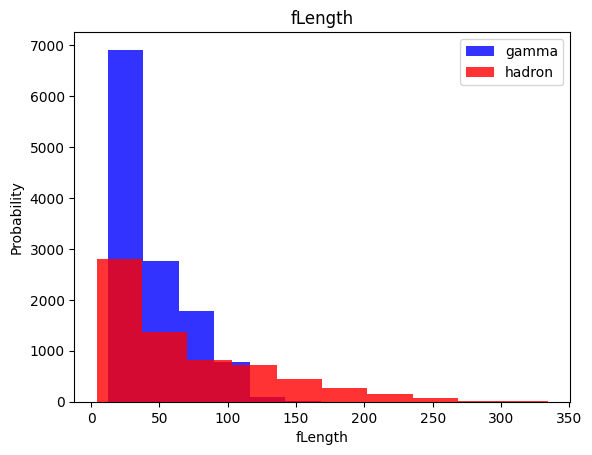

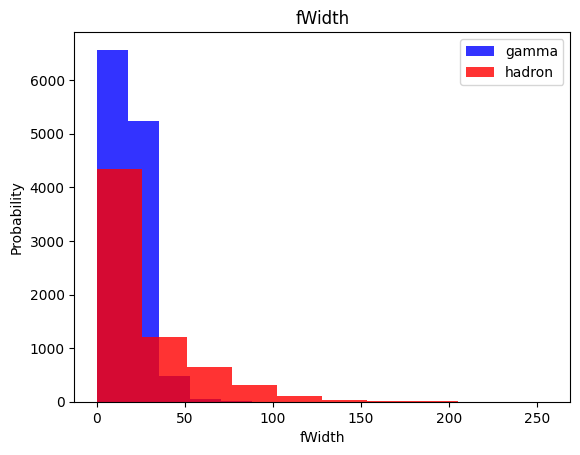

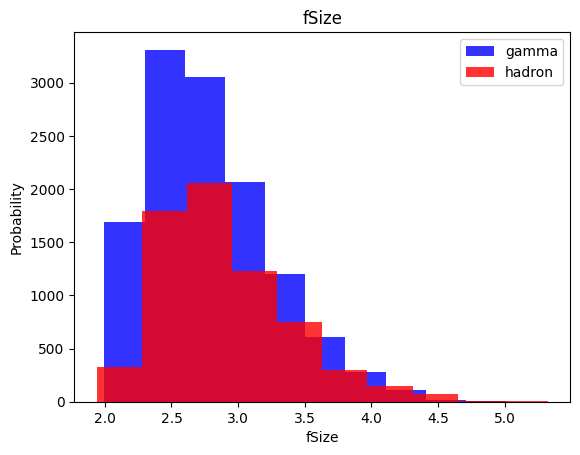

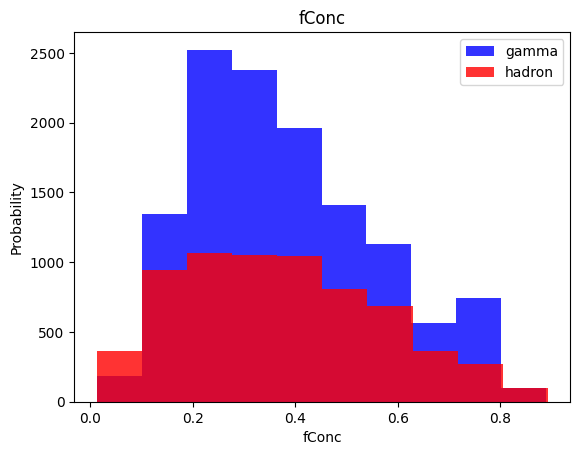

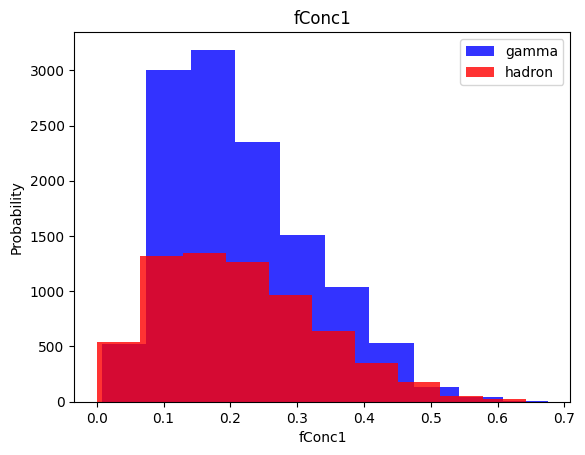

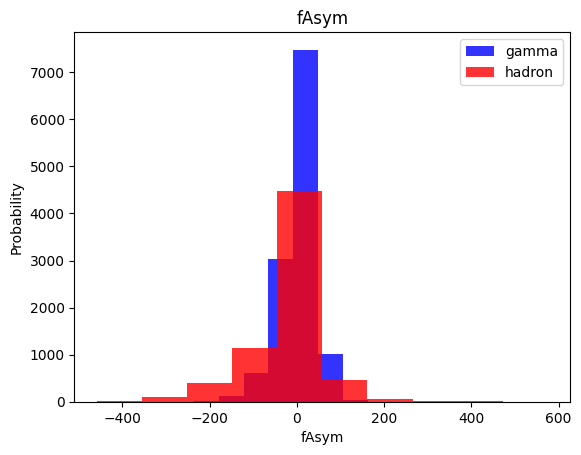

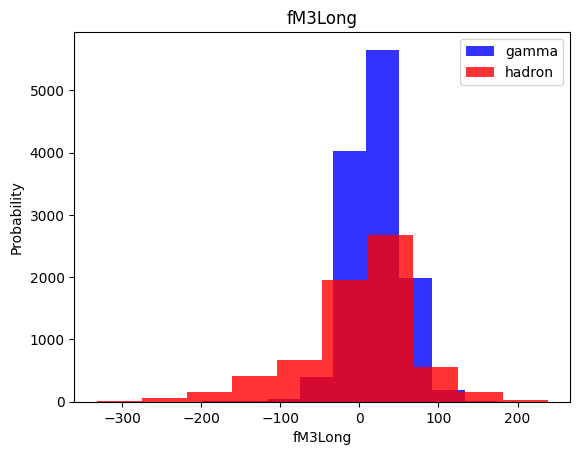

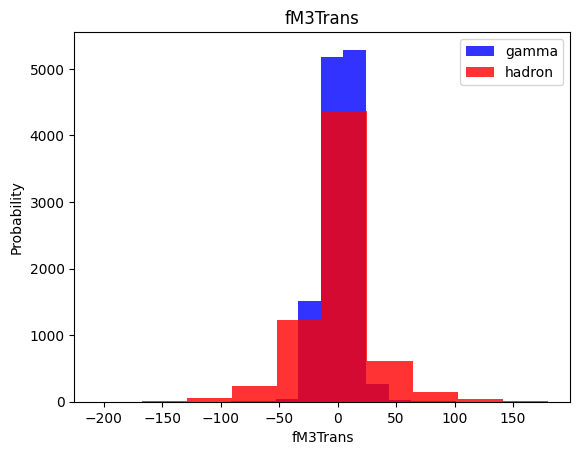

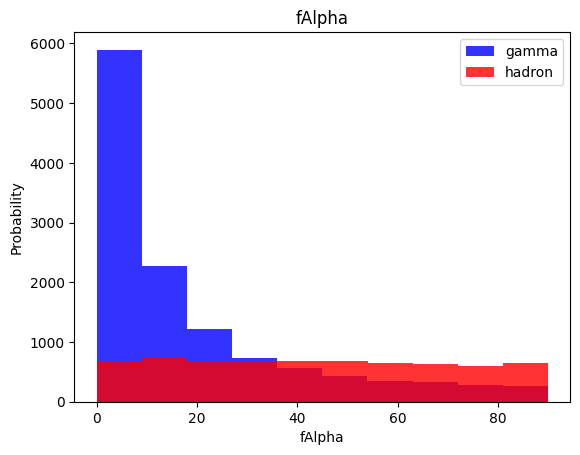

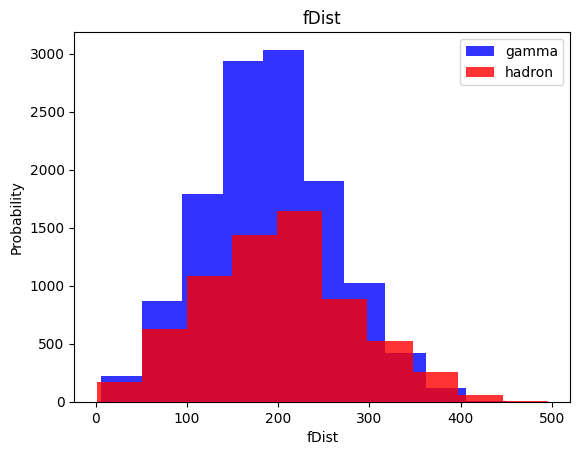

In [369]:
for label in columns[:-1]:
    plt.hist(data[data['class'] == 0][label], color='blue', label='gamma', alpha=0.8)
    plt.hist(data[data['class'] == 1][label], color='red', label='hadron', alpha=0.8)
    plt.title(label)
    plt.ylabel("Probability")
    plt.xlabel(label)
    plt.legend()
    plt.show()

In [370]:
X = data.iloc[:,:-1].values
y = data.iloc[:,-1].values

ros = RandomOverSampler()
X,y = ros.fit_resample(X, y)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, shuffle=True)

scaler = MinMaxScaler(feature_range=(0,1))

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test) 

In [371]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix

knn_model = KNeighborsClassifier(n_neighbors=3)
knn_model.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [372]:
y_pred = knn_model.predict(X_test)
y_pred

array([1, 0, 0, ..., 0, 0, 0], dtype=int64)

In [373]:
print(classification_report(y_pred, y_test))
print(confusion_matrix(y_pred, y_test))

              precision    recall  f1-score   support

           0       0.85      0.83      0.84      3755
           1       0.83      0.85      0.84      3645

    accuracy                           0.84      7400
   macro avg       0.84      0.84      0.84      7400
weighted avg       0.84      0.84      0.84      7400

[[3105  650]
 [ 553 3092]]


In [374]:
from sklearn.naive_bayes import GaussianNB

nb_model = GaussianNB()
nb_model.fit(X_train, y_train)

GaussianNB()

In [375]:
y_pred = nb_model.predict(X_test)

In [376]:
print(classification_report(y_pred, y_test))
print(confusion_matrix(y_pred, y_test))

              precision    recall  f1-score   support

           0       0.89      0.60      0.72      5483
           1       0.41      0.80      0.54      1917

    accuracy                           0.65      7400
   macro avg       0.65      0.70      0.63      7400
weighted avg       0.77      0.65      0.67      7400

[[3269 2214]
 [ 389 1528]]


In [377]:
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)

LogisticRegression()

In [378]:
y_pred = log_reg.predict(X_test)
y_pred

array([1, 0, 0, ..., 0, 0, 0], dtype=int64)

In [379]:
print(classification_report(y_pred, y_test))
print(confusion_matrix(y_pred, y_test))

              precision    recall  f1-score   support

           0       0.82      0.74      0.78      4032
           1       0.72      0.80      0.76      3368

    accuracy                           0.77      7400
   macro avg       0.77      0.77      0.77      7400
weighted avg       0.78      0.77      0.77      7400

[[2997 1035]
 [ 661 2707]]


In [380]:
from sklearn.svm import SVC

svm_model = SVC()
svm_model.fit(X_train, y_train)

SVC()

In [381]:
y_pred = svm_model.predict(X_test)
y_pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [382]:
print(classification_report(y_pred, y_test))
print(confusion_matrix(y_pred, y_test))

              precision    recall  f1-score   support

           0       0.89      0.81      0.85      3988
           1       0.80      0.88      0.84      3412

    accuracy                           0.84      7400
   macro avg       0.84      0.84      0.84      7400
weighted avg       0.85      0.84      0.84      7400

[[3238  750]
 [ 420 2992]]


Neural Network (Deep Learning)

In [383]:
import tensorflow as tf
from tensorflow.keras.layers import Dense, Input, Dropout
from tensorflow.keras.optimizers import Adam, SGD

In [384]:

def train_model(X_train, y_train, num_nodes, dropout_rate, learning_rate, batch_size, epochs):
    nn_model = tf.keras.Sequential(
        [
            Input((X_train.shape[1],)),
            Dense(num_nodes, activation='relu'),
            Dropout(rate=dropout_rate),
            Dense(num_nodes, activation='relu'),
            Dropout(rate=dropout_rate),
            Dense(1, activation='sigmoid')
        ]
    )

    nn_model.compile(optimizer=Adam(learning_rate=learning_rate), loss='binary_crossentropy', metrics=['accuracy'])
    history = nn_model.fit(X_train, y_train, epochs=epochs, batch_size=batch_size, validation_split=0.2)
    
    return nn_model, history

In [385]:
def plot_loss(model):
    plt.plot(model.history.history['loss'], label='loss')
    plt.plot(model.history.history['val_loss'], label='val_loss')
    plt.xlabel('Epoch')
    plt.title('Loss vs Validation Loss')
    plt.legend()
    plt.show()

In [386]:
def plot_accuracy(model):
    plt.plot(model.history.history['accuracy'], label='loss')
    plt.plot(model.history.history['val_accuracy'], label='val_loss')
    plt.xlabel('Epoch')
    plt.title('Accuracy vs Validation Accuracy')
    plt.legend()
    plt.show()

Num nodes: 32, Drop out rate: 0, Learning Rate: 0.01, Batch Size: 32
Epoch 1/50
432/432 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.7523 - loss: 0.5030 - val_accuracy: 0.7892 - val_loss: 0.4279
Epoch 2/50
432/432 ━━━━━━━━━━━━━━━━━━━━ 0s 945us/step - accuracy: 0.7907 - loss: 0.4359 - val_accuracy: 0.8060 - val_loss: 0.4200
Epoch 3/50
432/432 ━━━━━━━━━━━━━━━━━━━━ 0s 939us/step - accuracy: 0.8161 - loss: 0.4029 - val_accuracy: 0.8329 - val_loss: 0.3898
Epoch 4/50
432/432 ━━━━━━━━━━━━━━━━━━━━ 0s 956us/step - accuracy: 0.8189 - loss: 0.3946 - val_accuracy: 0.8323 - val_loss: 0.3746
Epoch 5/50
432/432 ━━━━━━━━━━━━━━━━━━━━ 0s 937us/step - accuracy: 0.8215 - loss: 0.3831 - val_accuracy: 0.8303 - val_loss: 0.3771
Epoch 6/50
432/432 ━━━━━━━━━━━━━━━━━━━━ 0s 960us/step - accuracy: 0.8270 - loss: 0.3861 - val_accuracy: 0.8329 - val_loss: 0.3732
Epoch 7/50
432/432 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8372 - loss: 0.3644 - val_accuracy: 0.8309 - val_loss: 0.3730
Epoch 8/50
432/432 ━━━━━━

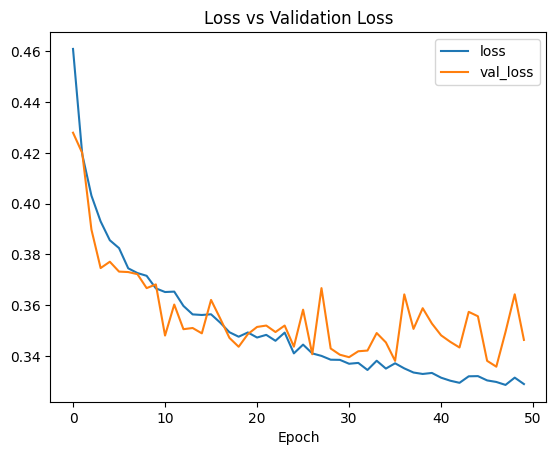

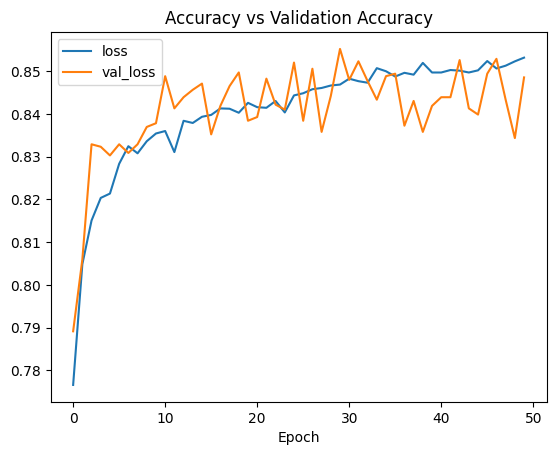

Num nodes: 32, Drop out rate: 0, Learning Rate: 0.01, Batch Size: 64
Epoch 1/50
216/216 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7340 - loss: 0.5370 - val_accuracy: 0.8089 - val_loss: 0.4113
Epoch 2/50
216/216 ━━━━━━━━━━━━━━━━━━━━ 0s 996us/step - accuracy: 0.7988 - loss: 0.4246 - val_accuracy: 0.8202 - val_loss: 0.3914
Epoch 3/50
216/216 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8086 - loss: 0.4152 - val_accuracy: 0.8013 - val_loss: 0.4173
Epoch 4/50
216/216 ━━━━━━━━━━━━━━━━━━━━ 0s 952us/step - accuracy: 0.8179 - loss: 0.3986 - val_accuracy: 0.8355 - val_loss: 0.3778
Epoch 5/50
216/216 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8221 - loss: 0.3855 - val_accuracy: 0.7924 - val_loss: 0.4254
Epoch 6/50
216/216 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8250 - loss: 0.3919 - val_accuracy: 0.8349 - val_loss: 0.3664
Epoch 7/50
216/216 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8282 - loss: 0.3781 - val_accuracy: 0.8413 - val_loss: 0.3594
Epoch 8/50
216/216 ━━━━━━━━━━━━

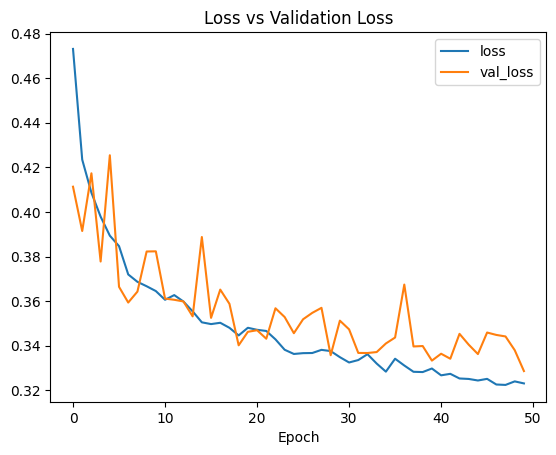

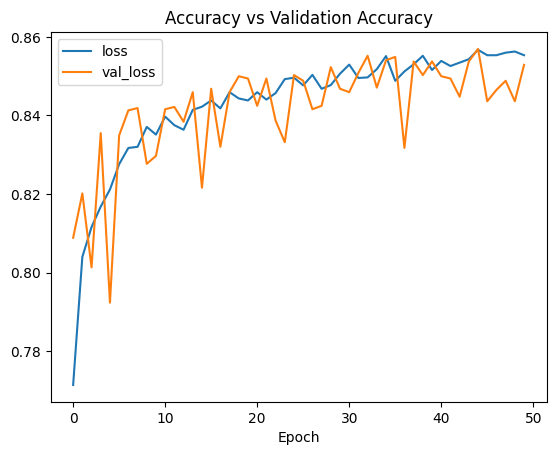

Num nodes: 32, Drop out rate: 0, Learning Rate: 0.001, Batch Size: 32
Epoch 1/50
432/432 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.7390 - loss: 0.5872 - val_accuracy: 0.7912 - val_loss: 0.4521
Epoch 2/50
432/432 ━━━━━━━━━━━━━━━━━━━━ 0s 949us/step - accuracy: 0.7887 - loss: 0.4541 - val_accuracy: 0.8065 - val_loss: 0.4216
Epoch 3/50
432/432 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8015 - loss: 0.4212 - val_accuracy: 0.8199 - val_loss: 0.4134
Epoch 4/50
432/432 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8146 - loss: 0.4096 - val_accuracy: 0.8158 - val_loss: 0.4085
Epoch 5/50
432/432 ━━━━━━━━━━━━━━━━━━━━ 0s 962us/step - accuracy: 0.8208 - loss: 0.4022 - val_accuracy: 0.8271 - val_loss: 0.3918
Epoch 6/50
432/432 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8174 - loss: 0.3943 - val_accuracy: 0.8306 - val_loss: 0.3863
Epoch 7/50
432/432 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8199 - loss: 0.4008 - val_accuracy: 0.8338 - val_loss: 0.3826
Epoch 8/50
432/432 ━━━━━━━━━━━

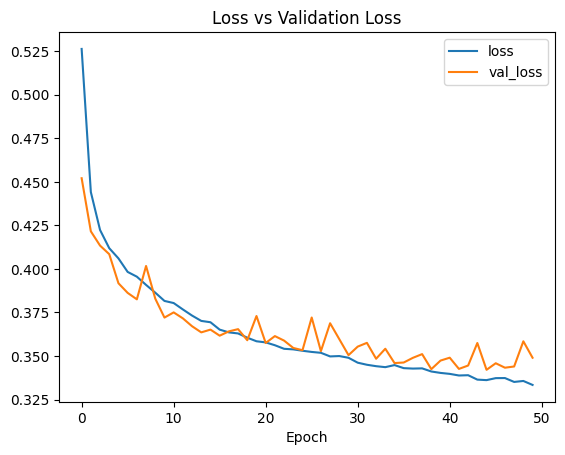

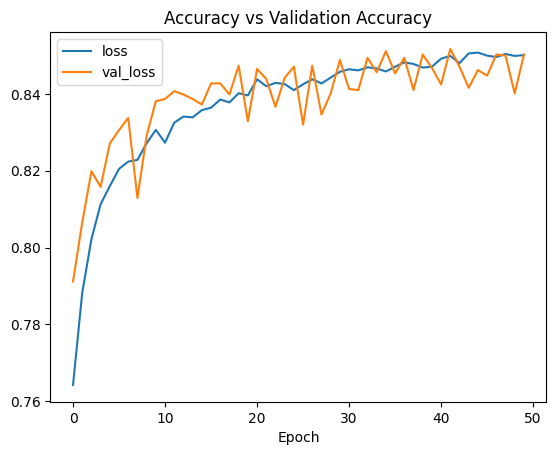

Num nodes: 32, Drop out rate: 0, Learning Rate: 0.001, Batch Size: 64
Epoch 1/50
216/216 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7363 - loss: 0.6081 - val_accuracy: 0.7869 - val_loss: 0.4838
Epoch 2/50
216/216 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7754 - loss: 0.4839 - val_accuracy: 0.7941 - val_loss: 0.4403
Epoch 3/50
216/216 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7913 - loss: 0.4404 - val_accuracy: 0.8074 - val_loss: 0.4223
Epoch 4/50
216/216 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7945 - loss: 0.4377 - val_accuracy: 0.8132 - val_loss: 0.4115
Epoch 5/50
216/216 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8094 - loss: 0.4173 - val_accuracy: 0.8155 - val_loss: 0.4091
Epoch 6/50
216/216 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8106 - loss: 0.4112 - val_accuracy: 0.8207 - val_loss: 0.4001
Epoch 7/50
216/216 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8099 - loss: 0.4140 - val_accuracy: 0.8210 - val_loss: 0.3972
Epoch 8/50
216/216 ━━━━━━━━━━━━━━━

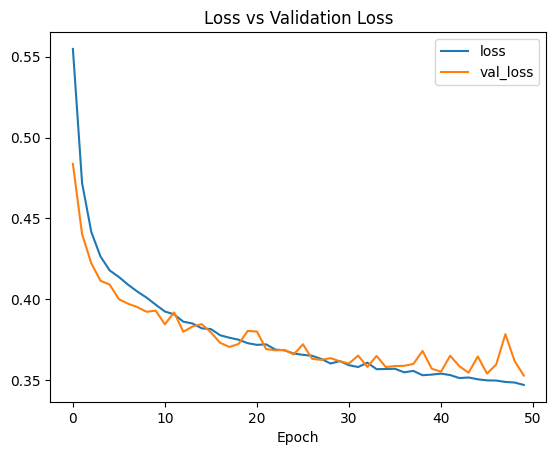

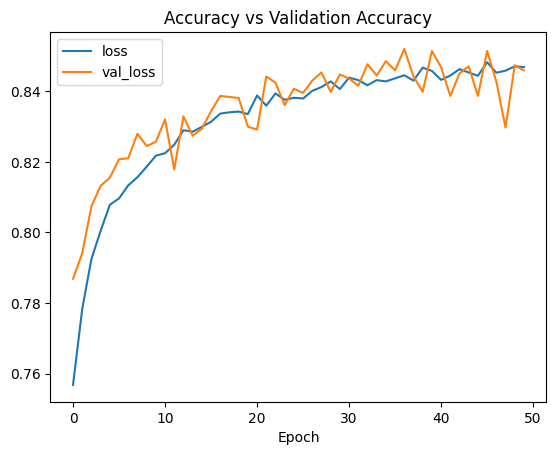

Num nodes: 32, Drop out rate: 0.2, Learning Rate: 0.01, Batch Size: 32
Epoch 1/50
432/432 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.7266 - loss: 0.5352 - val_accuracy: 0.7967 - val_loss: 0.4247
Epoch 2/50
432/432 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.7720 - loss: 0.4644 - val_accuracy: 0.7950 - val_loss: 0.4250
Epoch 3/50
432/432 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7905 - loss: 0.4421 - val_accuracy: 0.8109 - val_loss: 0.4128
Epoch 4/50
432/432 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7938 - loss: 0.4391 - val_accuracy: 0.8199 - val_loss: 0.4039
Epoch 5/50
432/432 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8108 - loss: 0.4236 - val_accuracy: 0.8219 - val_loss: 0.4001
Epoch 6/50
432/432 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8083 - loss: 0.4205 - val_accuracy: 0.8283 - val_loss: 0.3935
Epoch 7/50
432/432 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8098 - loss: 0.4125 - val_accuracy: 0.8265 - val_loss: 0.3904
Epoch 8/50
432/432 ━━━━━━━━━━━━━━

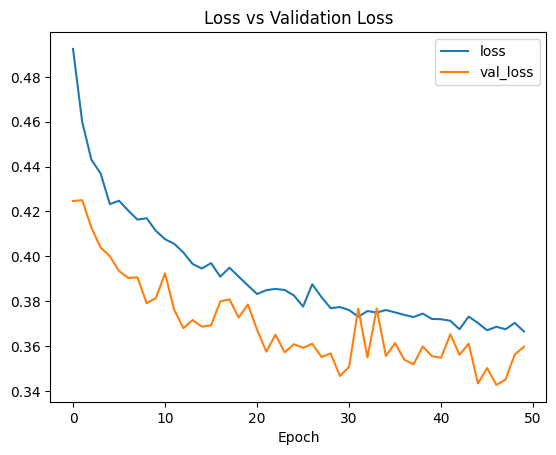

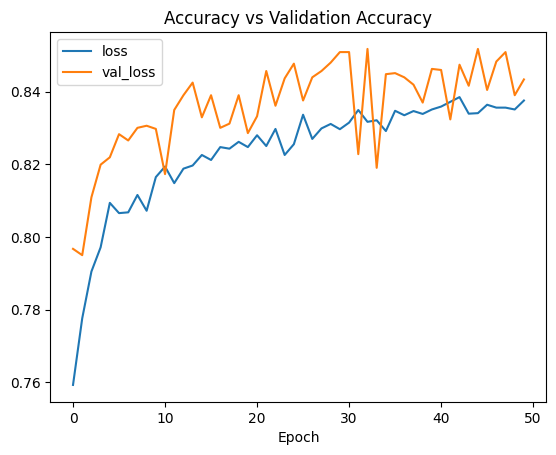

Num nodes: 32, Drop out rate: 0.2, Learning Rate: 0.01, Batch Size: 64
Epoch 1/50
216/216 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7250 - loss: 0.5401 - val_accuracy: 0.7622 - val_loss: 0.4456
Epoch 2/50
216/216 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7816 - loss: 0.4554 - val_accuracy: 0.8158 - val_loss: 0.4132
Epoch 3/50
216/216 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8009 - loss: 0.4347 - val_accuracy: 0.8089 - val_loss: 0.4128
Epoch 4/50
216/216 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8052 - loss: 0.4277 - val_accuracy: 0.8068 - val_loss: 0.4043
Epoch 5/50
216/216 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8042 - loss: 0.4282 - val_accuracy: 0.8094 - val_loss: 0.4077
Epoch 6/50
216/216 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8097 - loss: 0.4185 - val_accuracy: 0.8315 - val_loss: 0.3829
Epoch 7/50
216/216 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8118 - loss: 0.4135 - val_accuracy: 0.8309 - val_loss: 0.3841
Epoch 8/50
216/216 ━━━━━━━━━━━━━━

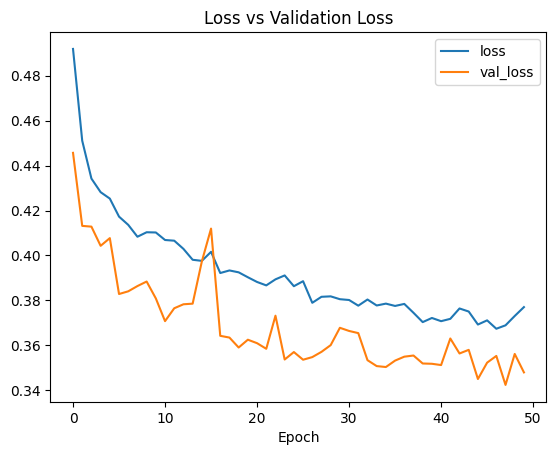

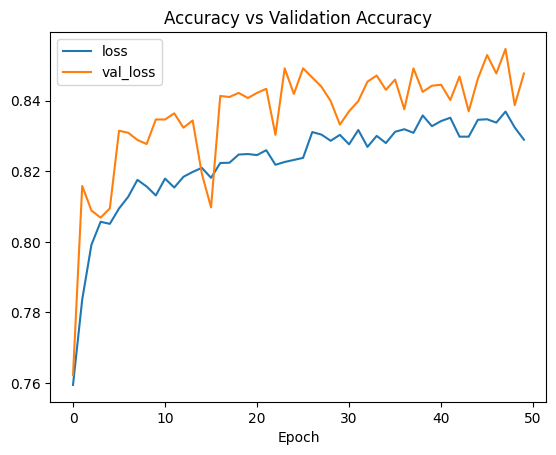

Num nodes: 32, Drop out rate: 0.2, Learning Rate: 0.001, Batch Size: 32
Epoch 1/50
432/432 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.6764 - loss: 0.6179 - val_accuracy: 0.7802 - val_loss: 0.4777
Epoch 2/50
432/432 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7661 - loss: 0.4900 - val_accuracy: 0.7909 - val_loss: 0.4413
Epoch 3/50
432/432 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.7678 - loss: 0.4794 - val_accuracy: 0.7877 - val_loss: 0.4415
Epoch 4/50
432/432 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7825 - loss: 0.4496 - val_accuracy: 0.8103 - val_loss: 0.4175
Epoch 5/50
432/432 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7919 - loss: 0.4430 - val_accuracy: 0.8149 - val_loss: 0.4094
Epoch 6/50
432/432 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7953 - loss: 0.4383 - val_accuracy: 0.8158 - val_loss: 0.4071
Epoch 7/50
432/432 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8027 - loss: 0.4230 - val_accuracy: 0.8268 - val_loss: 0.3988
Epoch 8/50
432/432 ━━━━━━━━━━━━━

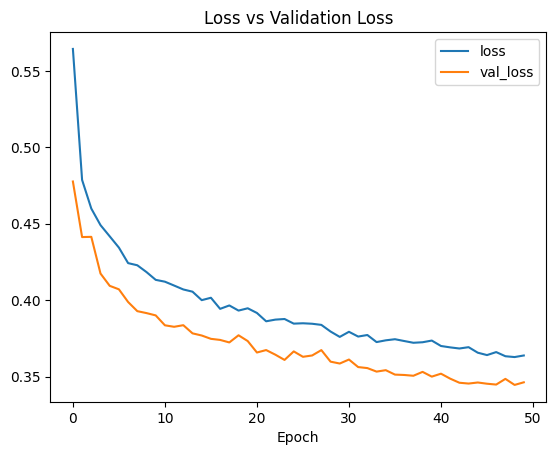

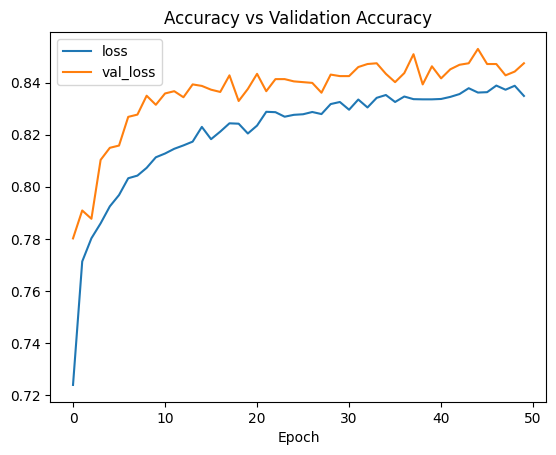

Num nodes: 32, Drop out rate: 0.2, Learning Rate: 0.001, Batch Size: 64
Epoch 1/50
216/216 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6432 - loss: 0.6411 - val_accuracy: 0.7689 - val_loss: 0.4958
Epoch 2/50
216/216 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7532 - loss: 0.5135 - val_accuracy: 0.7883 - val_loss: 0.4469
Epoch 3/50
216/216 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7725 - loss: 0.4712 - val_accuracy: 0.7958 - val_loss: 0.4339
Epoch 4/50
216/216 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7799 - loss: 0.4612 - val_accuracy: 0.8005 - val_loss: 0.4223
Epoch 5/50
216/216 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7907 - loss: 0.4423 - val_accuracy: 0.8022 - val_loss: 0.4206
Epoch 6/50
216/216 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7893 - loss: 0.4448 - val_accuracy: 0.8138 - val_loss: 0.4089
Epoch 7/50
216/216 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7966 - loss: 0.4329 - val_accuracy: 0.8135 - val_loss: 0.4043
Epoch 8/50
216/216 ━━━━━━━━━━━━━

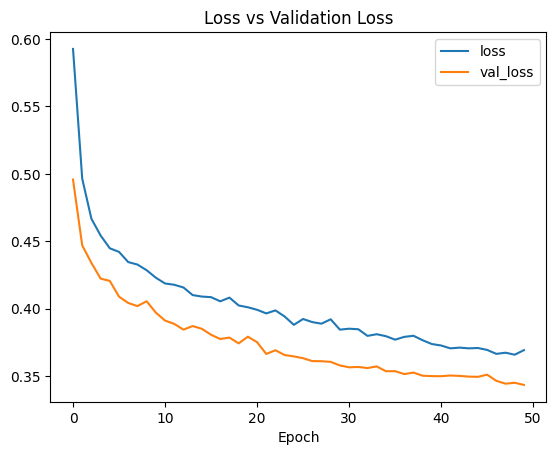

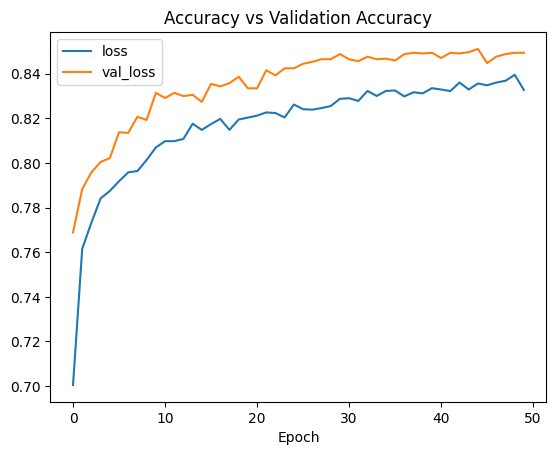

Num nodes: 64, Drop out rate: 0, Learning Rate: 0.01, Batch Size: 32
Epoch 1/50
432/432 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.7621 - loss: 0.4825 - val_accuracy: 0.8181 - val_loss: 0.3980
Epoch 2/50
432/432 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8100 - loss: 0.4153 - val_accuracy: 0.8028 - val_loss: 0.4237
Epoch 3/50
432/432 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8093 - loss: 0.4126 - val_accuracy: 0.8367 - val_loss: 0.3907
Epoch 4/50
432/432 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8171 - loss: 0.4003 - val_accuracy: 0.8280 - val_loss: 0.3831
Epoch 5/50
432/432 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8267 - loss: 0.3893 - val_accuracy: 0.8410 - val_loss: 0.3690
Epoch 6/50
432/432 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8249 - loss: 0.3845 - val_accuracy: 0.8326 - val_loss: 0.3735
Epoch 7/50
432/432 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8246 - loss: 0.3822 - val_accuracy: 0.8442 - val_loss: 0.3614
Epoch 8/50
432/432 ━━━━━━━━━━━━━━━━

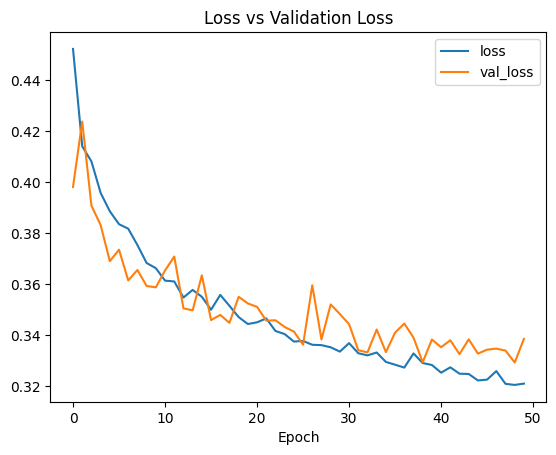

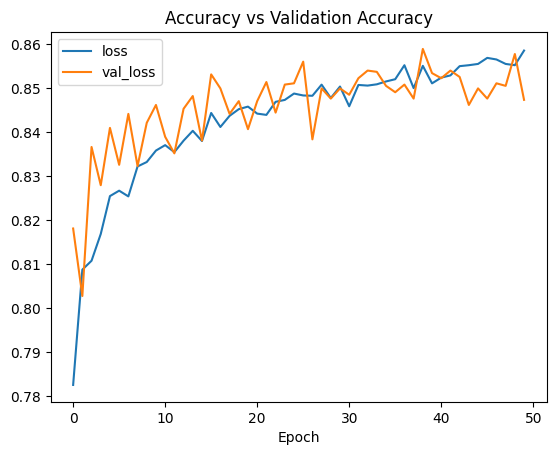

Num nodes: 64, Drop out rate: 0, Learning Rate: 0.01, Batch Size: 64
Epoch 1/50
216/216 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7418 - loss: 0.5084 - val_accuracy: 0.8057 - val_loss: 0.4139
Epoch 2/50
216/216 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7896 - loss: 0.4356 - val_accuracy: 0.8063 - val_loss: 0.4142
Epoch 3/50
216/216 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8119 - loss: 0.4079 - val_accuracy: 0.8343 - val_loss: 0.3787
Epoch 4/50
216/216 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8149 - loss: 0.4007 - val_accuracy: 0.8396 - val_loss: 0.3686
Epoch 5/50
216/216 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8252 - loss: 0.3844 - val_accuracy: 0.8349 - val_loss: 0.3709
Epoch 6/50
216/216 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8306 - loss: 0.3756 - val_accuracy: 0.8294 - val_loss: 0.3778
Epoch 7/50
216/216 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8337 - loss: 0.3766 - val_accuracy: 0.8393 - val_loss: 0.3690
Epoch 8/50
216/216 ━━━━━━━━━━━━━━━━

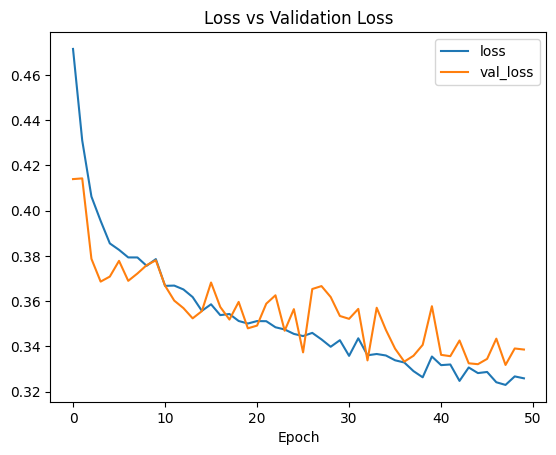

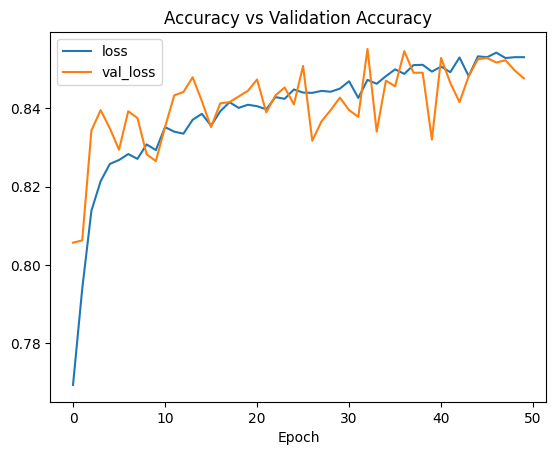

Num nodes: 64, Drop out rate: 0, Learning Rate: 0.001, Batch Size: 32
Epoch 1/50
432/432 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.7328 - loss: 0.5492 - val_accuracy: 0.7981 - val_loss: 0.4263
Epoch 2/50
432/432 ━━━━━━━━━━━━━━━━━━━━ 0s 979us/step - accuracy: 0.7945 - loss: 0.4314 - val_accuracy: 0.8178 - val_loss: 0.4017
Epoch 3/50
432/432 ━━━━━━━━━━━━━━━━━━━━ 0s 965us/step - accuracy: 0.8062 - loss: 0.4177 - val_accuracy: 0.8225 - val_loss: 0.3985
Epoch 4/50
432/432 ━━━━━━━━━━━━━━━━━━━━ 0s 976us/step - accuracy: 0.8151 - loss: 0.4011 - val_accuracy: 0.8245 - val_loss: 0.3882
Epoch 5/50
432/432 ━━━━━━━━━━━━━━━━━━━━ 0s 981us/step - accuracy: 0.8190 - loss: 0.3992 - val_accuracy: 0.8294 - val_loss: 0.3809
Epoch 6/50
432/432 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8258 - loss: 0.3872 - val_accuracy: 0.8372 - val_loss: 0.3743
Epoch 7/50
432/432 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8223 - loss: 0.3934 - val_accuracy: 0.8375 - val_loss: 0.3695
Epoch 8/50
432/432 ━━━━━━━

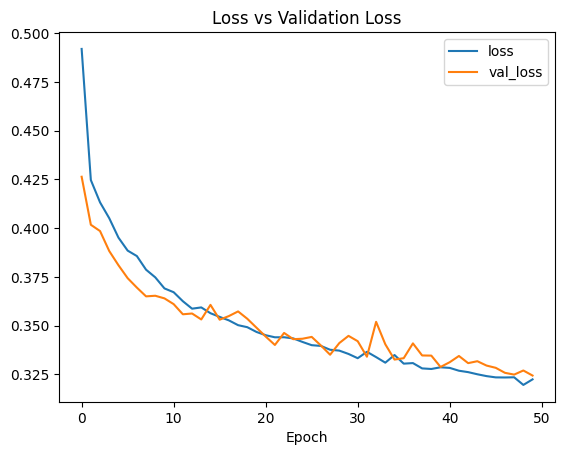

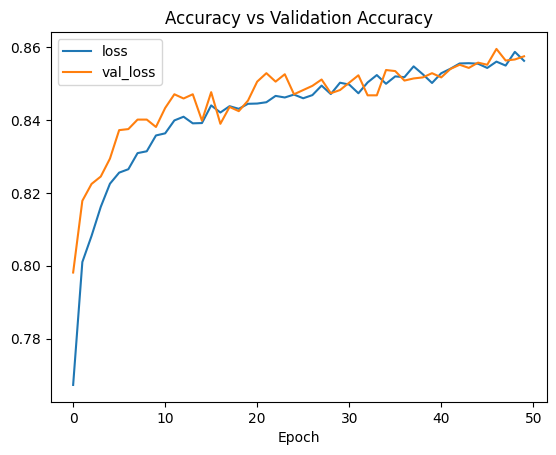

Num nodes: 64, Drop out rate: 0, Learning Rate: 0.001, Batch Size: 64
Epoch 1/50
216/216 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7152 - loss: 0.5910 - val_accuracy: 0.7903 - val_loss: 0.4591
Epoch 2/50
216/216 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7798 - loss: 0.4589 - val_accuracy: 0.8080 - val_loss: 0.4179
Epoch 3/50
216/216 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8035 - loss: 0.4255 - val_accuracy: 0.8173 - val_loss: 0.4078
Epoch 4/50
216/216 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8154 - loss: 0.4121 - val_accuracy: 0.8204 - val_loss: 0.3995
Epoch 5/50
216/216 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8139 - loss: 0.4079 - val_accuracy: 0.8262 - val_loss: 0.3938
Epoch 6/50
216/216 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8232 - loss: 0.3984 - val_accuracy: 0.8338 - val_loss: 0.3861
Epoch 7/50
216/216 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8230 - loss: 0.3917 - val_accuracy: 0.8288 - val_loss: 0.3800
Epoch 8/50
216/216 ━━━━━━━━━━━━━━━

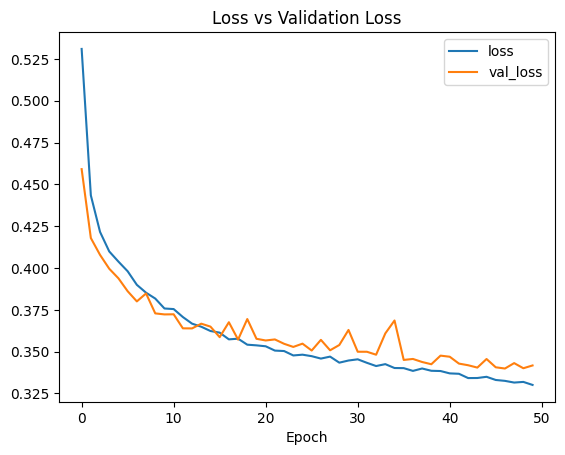

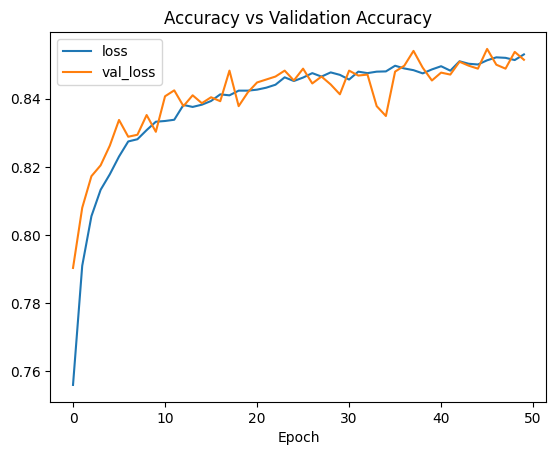

Num nodes: 64, Drop out rate: 0.2, Learning Rate: 0.01, Batch Size: 32
Epoch 1/50
432/432 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.7544 - loss: 0.5074 - val_accuracy: 0.7938 - val_loss: 0.4246
Epoch 2/50
432/432 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7841 - loss: 0.4508 - val_accuracy: 0.8074 - val_loss: 0.4112
Epoch 3/50
432/432 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7982 - loss: 0.4361 - val_accuracy: 0.8138 - val_loss: 0.4026
Epoch 4/50
432/432 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.7952 - loss: 0.4303 - val_accuracy: 0.8254 - val_loss: 0.3898
Epoch 5/50
432/432 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8138 - loss: 0.4112 - val_accuracy: 0.8054 - val_loss: 0.4196
Epoch 6/50
432/432 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8056 - loss: 0.4201 - val_accuracy: 0.8274 - val_loss: 0.3851
Epoch 7/50
432/432 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8177 - loss: 0.4080 - val_accuracy: 0.8320 - val_loss: 0.3868
Epoch 8/50
432/432 ━━━━━━━━━━━━━━

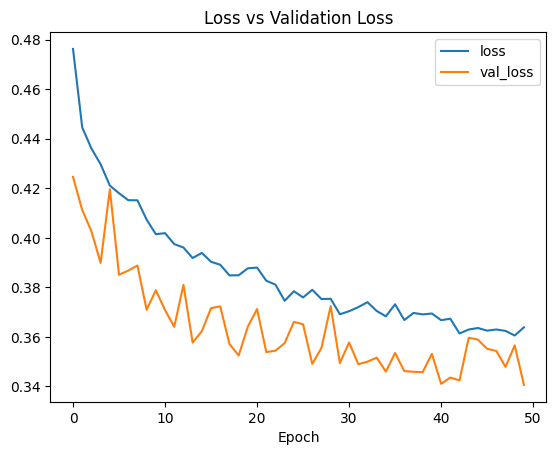

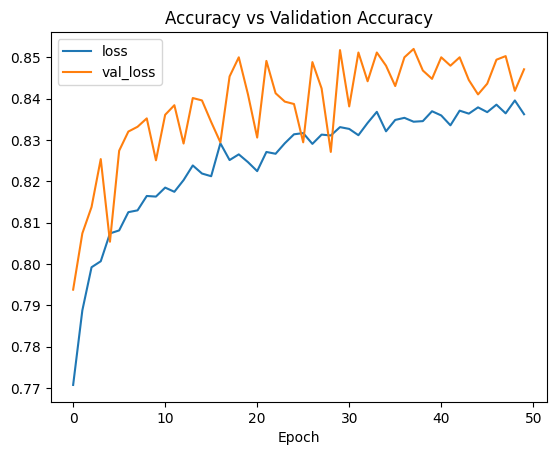

Num nodes: 64, Drop out rate: 0.2, Learning Rate: 0.01, Batch Size: 64
Epoch 1/50
216/216 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7211 - loss: 0.5266 - val_accuracy: 0.7990 - val_loss: 0.4210
Epoch 2/50
216/216 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7884 - loss: 0.4439 - val_accuracy: 0.8254 - val_loss: 0.3995
Epoch 3/50
216/216 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7985 - loss: 0.4335 - val_accuracy: 0.8225 - val_loss: 0.4132
Epoch 4/50
216/216 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8053 - loss: 0.4262 - val_accuracy: 0.8222 - val_loss: 0.4004
Epoch 5/50
216/216 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8058 - loss: 0.4234 - val_accuracy: 0.8346 - val_loss: 0.3796
Epoch 6/50
216/216 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8093 - loss: 0.4120 - val_accuracy: 0.8358 - val_loss: 0.3731
Epoch 7/50
216/216 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8183 - loss: 0.4031 - val_accuracy: 0.8341 - val_loss: 0.3690
Epoch 8/50
216/216 ━━━━━━━━━━━━━━

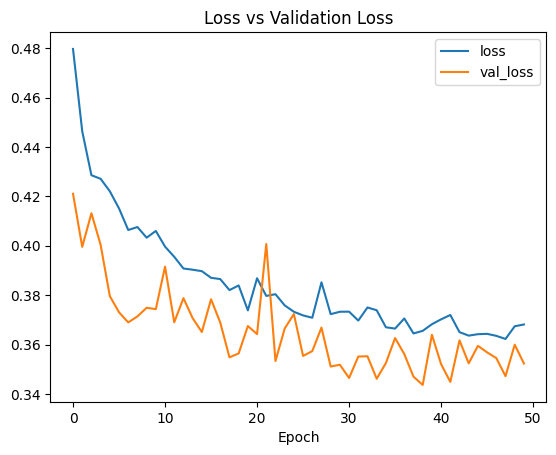

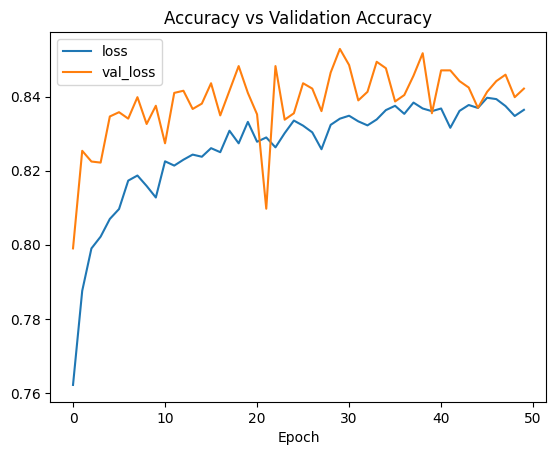

Num nodes: 64, Drop out rate: 0.2, Learning Rate: 0.001, Batch Size: 32
Epoch 1/50
432/432 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.7051 - loss: 0.5766 - val_accuracy: 0.7935 - val_loss: 0.4376
Epoch 2/50
432/432 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.7801 - loss: 0.4520 - val_accuracy: 0.8051 - val_loss: 0.4152
Epoch 3/50
432/432 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7968 - loss: 0.4304 - val_accuracy: 0.8199 - val_loss: 0.4015
Epoch 4/50
432/432 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8027 - loss: 0.4270 - val_accuracy: 0.8274 - val_loss: 0.3884
Epoch 5/50
432/432 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8179 - loss: 0.4003 - val_accuracy: 0.8338 - val_loss: 0.3822
Epoch 6/50
432/432 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8085 - loss: 0.4112 - val_accuracy: 0.8349 - val_loss: 0.3801
Epoch 7/50
432/432 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8236 - loss: 0.3930 - val_accuracy: 0.8378 - val_loss: 0.3738
Epoch 8/50
432/432 ━━━━━━━━━━━━━

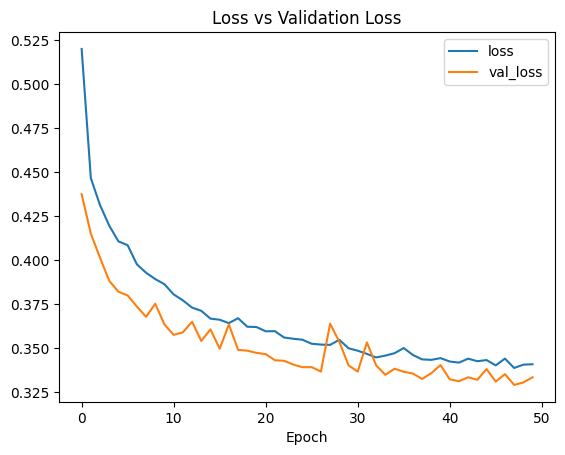

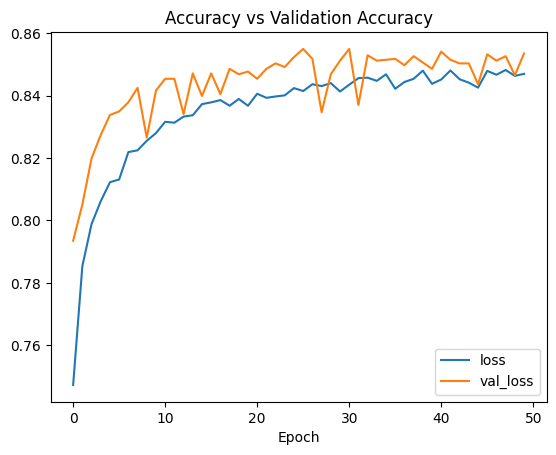

Num nodes: 64, Drop out rate: 0.2, Learning Rate: 0.001, Batch Size: 64
Epoch 1/50
216/216 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6808 - loss: 0.6060 - val_accuracy: 0.7756 - val_loss: 0.4662
Epoch 2/50
216/216 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7709 - loss: 0.4738 - val_accuracy: 0.8019 - val_loss: 0.4243
Epoch 3/50
216/216 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7906 - loss: 0.4460 - val_accuracy: 0.8141 - val_loss: 0.4098
Epoch 4/50
216/216 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7946 - loss: 0.4293 - val_accuracy: 0.8210 - val_loss: 0.4013
Epoch 5/50
216/216 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8016 - loss: 0.4332 - val_accuracy: 0.8248 - val_loss: 0.3955
Epoch 6/50
216/216 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8079 - loss: 0.4191 - val_accuracy: 0.8268 - val_loss: 0.3908
Epoch 7/50
216/216 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8095 - loss: 0.4202 - val_accuracy: 0.8329 - val_loss: 0.3817
Epoch 8/50
216/216 ━━━━━━━━━━━━━

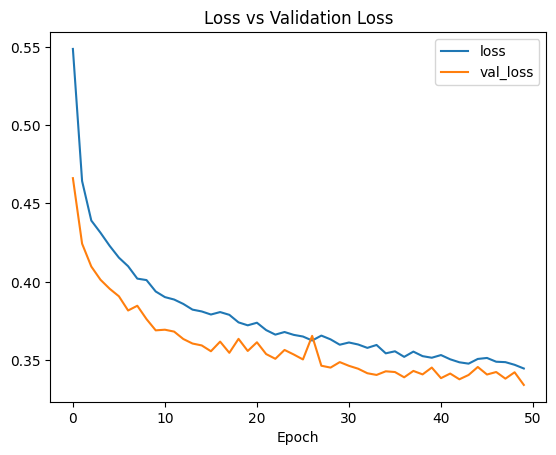

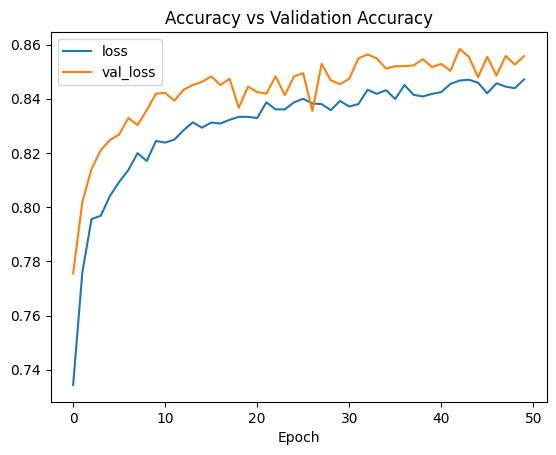

Num nodes: 128, Drop out rate: 0, Learning Rate: 0.01, Batch Size: 32
Epoch 1/50
432/432 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.7444 - loss: 0.5011 - val_accuracy: 0.7738 - val_loss: 0.4624
Epoch 2/50
432/432 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7901 - loss: 0.4442 - val_accuracy: 0.8173 - val_loss: 0.3999
Epoch 3/50
432/432 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8123 - loss: 0.4126 - val_accuracy: 0.8268 - val_loss: 0.3793
Epoch 4/50
432/432 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8159 - loss: 0.4028 - val_accuracy: 0.8147 - val_loss: 0.4008
Epoch 5/50
432/432 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8181 - loss: 0.3989 - val_accuracy: 0.8323 - val_loss: 0.3755
Epoch 6/50
432/432 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8221 - loss: 0.3793 - val_accuracy: 0.8262 - val_loss: 0.3862
Epoch 7/50
432/432 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8378 - loss: 0.3638 - val_accuracy: 0.8387 - val_loss: 0.3613
Epoch 8/50
432/432 ━━━━━━━━━━━━━━━

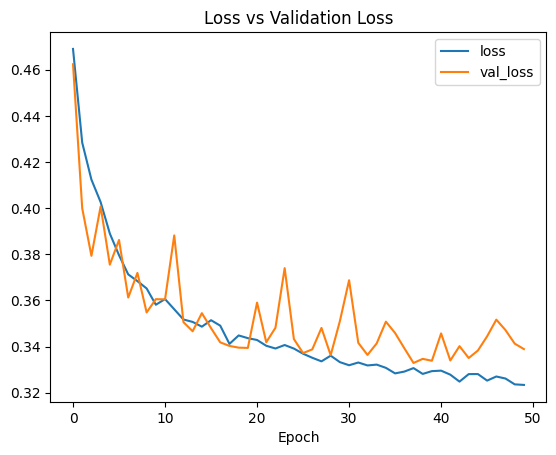

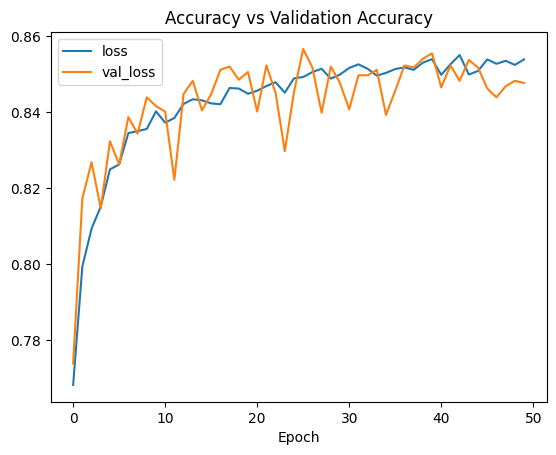

Num nodes: 128, Drop out rate: 0, Learning Rate: 0.01, Batch Size: 64
Epoch 1/50
216/216 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7503 - loss: 0.4991 - val_accuracy: 0.8036 - val_loss: 0.4212
Epoch 2/50
216/216 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8025 - loss: 0.4261 - val_accuracy: 0.8173 - val_loss: 0.4141
Epoch 3/50
216/216 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8068 - loss: 0.4191 - val_accuracy: 0.8181 - val_loss: 0.4128
Epoch 4/50
216/216 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8124 - loss: 0.4098 - val_accuracy: 0.8291 - val_loss: 0.3900
Epoch 5/50
216/216 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8229 - loss: 0.3939 - val_accuracy: 0.8291 - val_loss: 0.3861
Epoch 6/50
216/216 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8310 - loss: 0.3823 - val_accuracy: 0.8259 - val_loss: 0.3926
Epoch 7/50
216/216 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8321 - loss: 0.3831 - val_accuracy: 0.8291 - val_loss: 0.3782
Epoch 8/50
216/216 ━━━━━━━━━━━━━━━

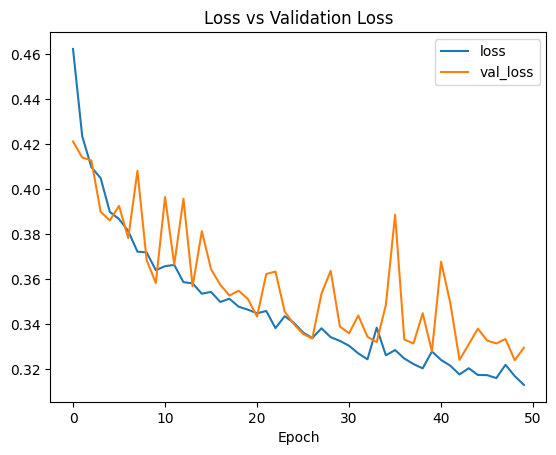

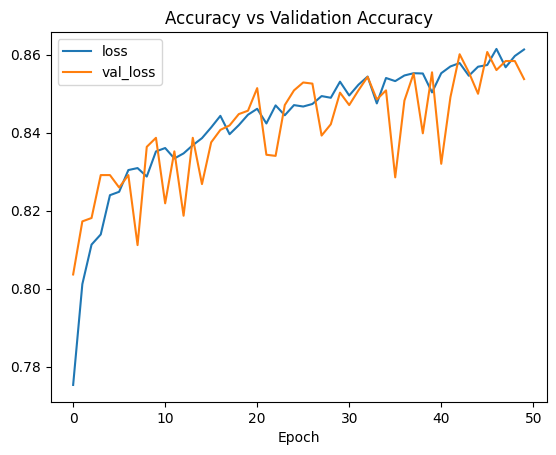

Num nodes: 128, Drop out rate: 0, Learning Rate: 0.001, Batch Size: 32
Epoch 1/50
432/432 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.7372 - loss: 0.5352 - val_accuracy: 0.8138 - val_loss: 0.4223
Epoch 2/50
432/432 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8003 - loss: 0.4294 - val_accuracy: 0.7909 - val_loss: 0.4281
Epoch 3/50
432/432 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8124 - loss: 0.4164 - val_accuracy: 0.8323 - val_loss: 0.3855
Epoch 4/50
432/432 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8206 - loss: 0.3954 - val_accuracy: 0.8338 - val_loss: 0.3831
Epoch 5/50
432/432 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8341 - loss: 0.3783 - val_accuracy: 0.8294 - val_loss: 0.3768
Epoch 6/50
432/432 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8319 - loss: 0.3794 - val_accuracy: 0.8425 - val_loss: 0.3640
Epoch 7/50
432/432 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8365 - loss: 0.3721 - val_accuracy: 0.8303 - val_loss: 0.3747
Epoch 8/50
432/432 ━━━━━━━━━━━━━━

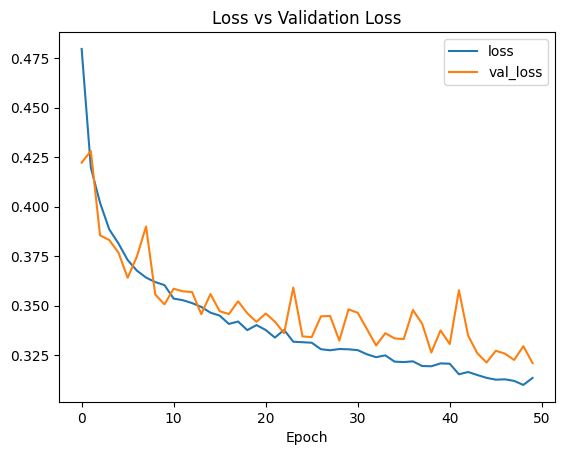

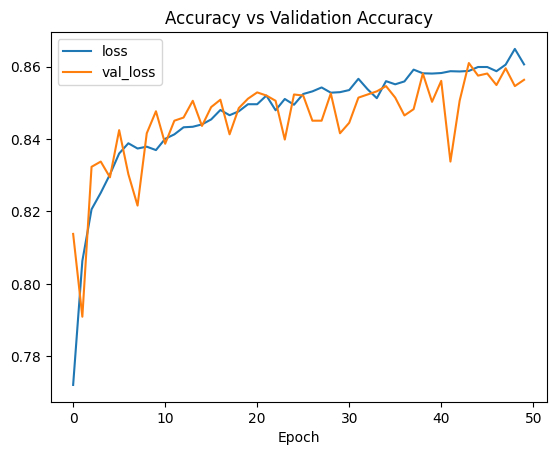

Num nodes: 128, Drop out rate: 0, Learning Rate: 0.001, Batch Size: 64
Epoch 1/50
216/216 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7331 - loss: 0.5611 - val_accuracy: 0.7950 - val_loss: 0.4404
Epoch 2/50
216/216 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7953 - loss: 0.4366 - val_accuracy: 0.8155 - val_loss: 0.4067
Epoch 3/50
216/216 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8151 - loss: 0.4109 - val_accuracy: 0.8042 - val_loss: 0.4066
Epoch 4/50
216/216 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8193 - loss: 0.4023 - val_accuracy: 0.8338 - val_loss: 0.3856
Epoch 5/50
216/216 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8311 - loss: 0.3957 - val_accuracy: 0.8346 - val_loss: 0.3775
Epoch 6/50
216/216 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8223 - loss: 0.3897 - val_accuracy: 0.8367 - val_loss: 0.3711
Epoch 7/50
216/216 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8353 - loss: 0.3714 - val_accuracy: 0.8419 - val_loss: 0.3688
Epoch 8/50
216/216 ━━━━━━━━━━━━━━

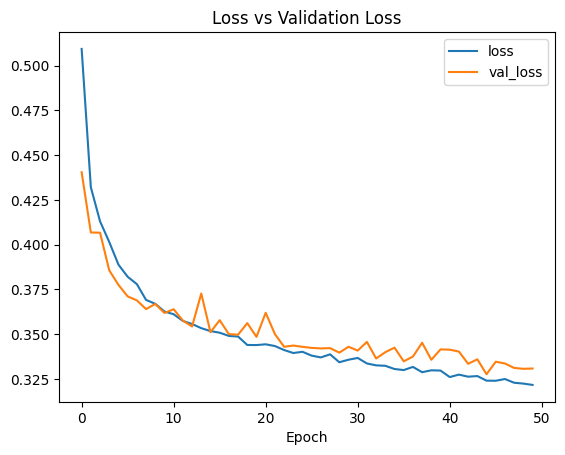

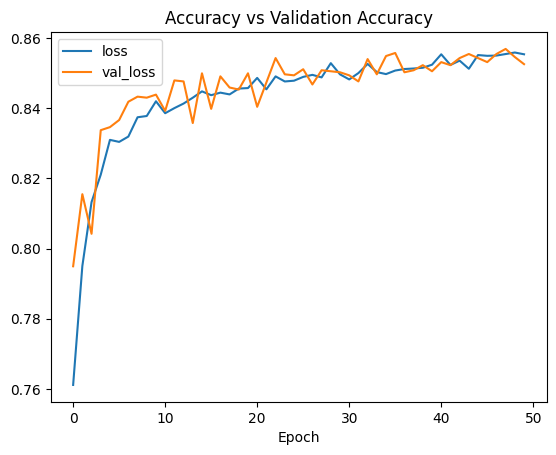

Num nodes: 128, Drop out rate: 0.2, Learning Rate: 0.01, Batch Size: 32
Epoch 1/50
432/432 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.7435 - loss: 0.5179 - val_accuracy: 0.7953 - val_loss: 0.4319
Epoch 2/50
432/432 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.7808 - loss: 0.4594 - val_accuracy: 0.8202 - val_loss: 0.4077
Epoch 3/50
432/432 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.7931 - loss: 0.4439 - val_accuracy: 0.8204 - val_loss: 0.3979
Epoch 4/50
432/432 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.7958 - loss: 0.4350 - val_accuracy: 0.8042 - val_loss: 0.4178
Epoch 5/50
432/432 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8054 - loss: 0.4243 - val_accuracy: 0.8262 - val_loss: 0.3889
Epoch 6/50
432/432 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8106 - loss: 0.4150 - val_accuracy: 0.8300 - val_loss: 0.3891
Epoch 7/50
432/432 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8042 - loss: 0.4237 - val_accuracy: 0.8231 - val_loss: 0.3953
Epoch 8/50
432/432 ━━━━━━━━━━━━━

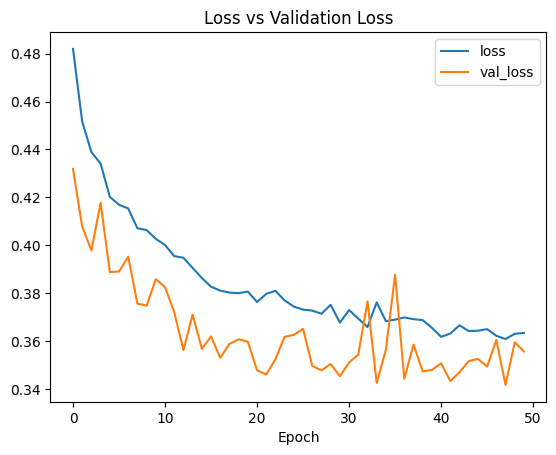

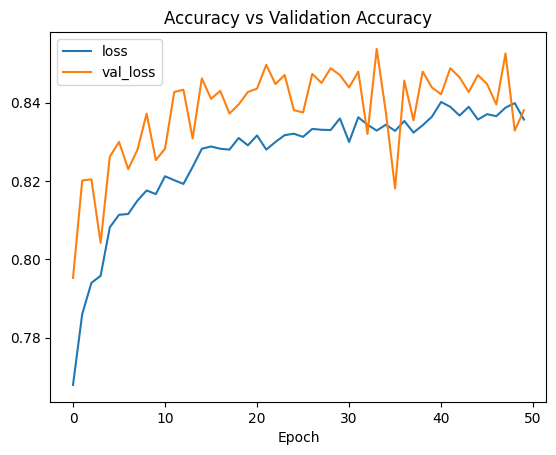

Num nodes: 128, Drop out rate: 0.2, Learning Rate: 0.01, Batch Size: 64
Epoch 1/50
216/216 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7522 - loss: 0.5155 - val_accuracy: 0.8060 - val_loss: 0.4171
Epoch 2/50
216/216 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7869 - loss: 0.4455 - val_accuracy: 0.8129 - val_loss: 0.4122
Epoch 3/50
216/216 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7982 - loss: 0.4259 - val_accuracy: 0.8202 - val_loss: 0.3970
Epoch 4/50
216/216 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8037 - loss: 0.4331 - val_accuracy: 0.8288 - val_loss: 0.3891
Epoch 5/50
216/216 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8056 - loss: 0.4169 - val_accuracy: 0.8251 - val_loss: 0.3841
Epoch 6/50
216/216 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8134 - loss: 0.4100 - val_accuracy: 0.8173 - val_loss: 0.3917
Epoch 7/50
216/216 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8043 - loss: 0.4163 - val_accuracy: 0.8335 - val_loss: 0.3779
Epoch 8/50
216/216 ━━━━━━━━━━━━━

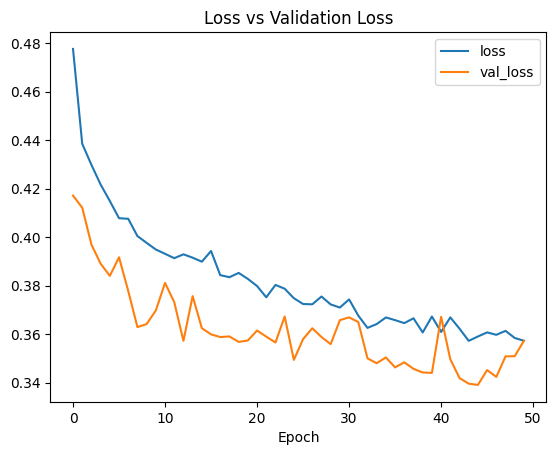

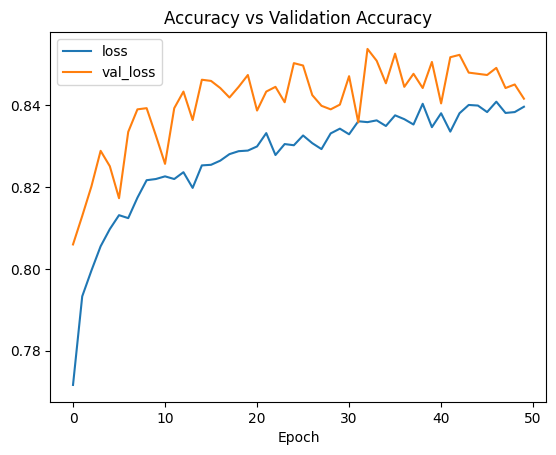

Num nodes: 128, Drop out rate: 0.2, Learning Rate: 0.001, Batch Size: 32
Epoch 1/50
432/432 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.7211 - loss: 0.5595 - val_accuracy: 0.7976 - val_loss: 0.4228
Epoch 2/50
432/432 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.7950 - loss: 0.4274 - val_accuracy: 0.8132 - val_loss: 0.4015
Epoch 3/50
432/432 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8051 - loss: 0.4205 - val_accuracy: 0.8109 - val_loss: 0.3970
Epoch 4/50
432/432 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8093 - loss: 0.4099 - val_accuracy: 0.8245 - val_loss: 0.3917
Epoch 5/50
432/432 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8207 - loss: 0.4006 - val_accuracy: 0.8320 - val_loss: 0.3868
Epoch 6/50
432/432 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8260 - loss: 0.3926 - val_accuracy: 0.8370 - val_loss: 0.3710
Epoch 7/50
432/432 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8245 - loss: 0.3898 - val_accuracy: 0.8410 - val_loss: 0.3672
Epoch 8/50
432/432 ━━━━━━━━━━━━

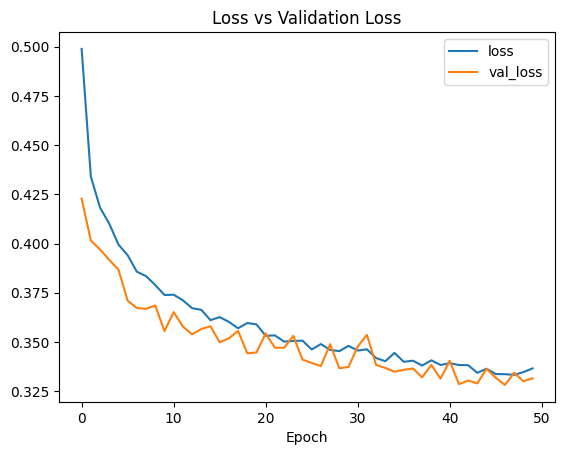

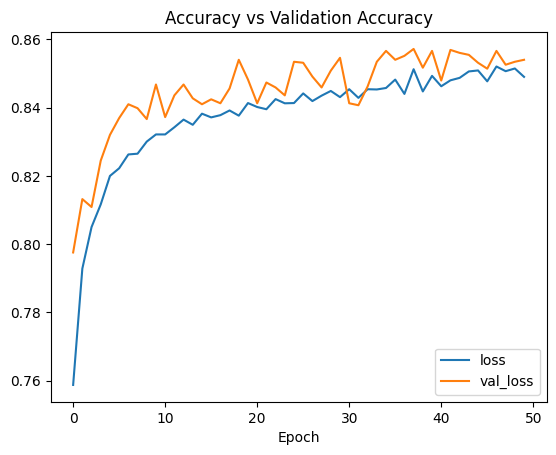

Num nodes: 128, Drop out rate: 0.2, Learning Rate: 0.001, Batch Size: 64
Epoch 1/50
216/216 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7169 - loss: 0.5767 - val_accuracy: 0.7979 - val_loss: 0.4349
Epoch 2/50
216/216 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7872 - loss: 0.4457 - val_accuracy: 0.8129 - val_loss: 0.4100
Epoch 3/50
216/216 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8021 - loss: 0.4344 - val_accuracy: 0.8265 - val_loss: 0.3967
Epoch 4/50
216/216 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8148 - loss: 0.4148 - val_accuracy: 0.8277 - val_loss: 0.3896
Epoch 5/50
216/216 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8132 - loss: 0.4099 - val_accuracy: 0.8326 - val_loss: 0.3834
Epoch 6/50
216/216 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8239 - loss: 0.3976 - val_accuracy: 0.8381 - val_loss: 0.3740
Epoch 7/50
216/216 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8281 - loss: 0.3888 - val_accuracy: 0.8349 - val_loss: 0.3707
Epoch 8/50
216/216 ━━━━━━━━━━━━

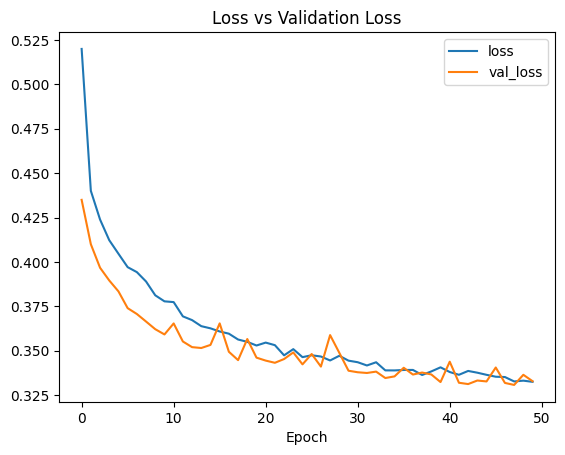

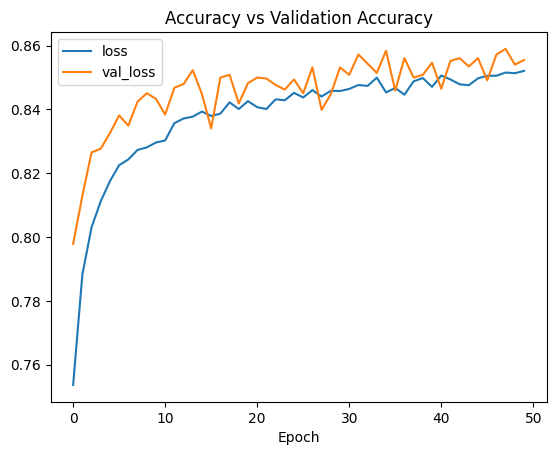

In [387]:
import math

epochs = 50
least_val_loss = math.inf
least_loss_model = None
for num_nodes in [32,64,128]:
    for dropout_rate in [0, 0.2]:
        for lr in [0.01, 0.001]:
            for batch_size in [32, 64]:
                print(f"Num nodes: {num_nodes}, Drop out rate: {dropout_rate}, Learning Rate: {lr}, Batch Size: {batch_size}")
                model, history = train_model(X_train, y_train, num_nodes, dropout_rate, lr, batch_size, epochs)
                plot_loss(model)
                plot_accuracy(model)
                loss = model.history.history['val_loss']
                val_loss = sum(loss)/len(loss)
                
                if val_loss < least_val_loss:
                    least_val_loss = val_loss
                    least_loss_model = model

In [390]:
y_pred = least_loss_model.predict(X_test)

232/232 ━━━━━━━━━━━━━━━━━━━━ 0s 649us/step


In [397]:
y_pred = (y_pred > 0.5).astype(int)
y_pred = np.reshape(y_pred, (y_pred.shape[0]))
y_pred

array([0, 0, 0, ..., 0, 1, 0])

In [400]:
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[3320  338]
 [ 684 3058]]
              precision    recall  f1-score   support

           0       0.83      0.91      0.87      3658
           1       0.90      0.82      0.86      3742

    accuracy                           0.86      7400
   macro avg       0.86      0.86      0.86      7400
weighted avg       0.87      0.86      0.86      7400

